In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv("train.csv")

In [10]:
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
0,1,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600
1,2,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400
2,3,CA-2017-138688,12/06/2017,16/06/2017,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200
3,4,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775
4,5,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9800 entries, 0 to 9799
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9800 non-null   int64  
 1   Order ID       9800 non-null   object 
 2   Order Date     9800 non-null   object 
 3   Ship Date      9800 non-null   object 
 4   Ship Mode      9800 non-null   object 
 5   Customer ID    9800 non-null   object 
 6   Customer Name  9800 non-null   object 
 7   Segment        9800 non-null   object 
 8   Country        9800 non-null   object 
 9   City           9800 non-null   object 
 10  State          9800 non-null   object 
 11  Postal Code    9789 non-null   float64
 12  Region         9800 non-null   object 
 13  Product ID     9800 non-null   object 
 14  Category       9800 non-null   object 
 15  Sub-Category   9800 non-null   object 
 16  Product Name   9800 non-null   object 
 17  Sales          9800 non-null   float64
dtypes: float

In [ ]:
#fill null values
df["Postal Code"].fillna(0,inplace=True)
df["Postal Code"]=df["Postal Code"].astype("Int64")
df.info()

In [ ]:
#duplicates
if(df.duplicated().sum()>0):
    print("duplicates exists")
    #df.drop_duplicates(inplace=True)
else:
    print("no duplicates")

no duplicates


In [11]:
types_of_customers=df["Segment"].unique()
print(types_of_customers)

['Consumer' 'Corporate' 'Home Office']


In [19]:
number_of_customers=df['Segment'].value_counts().reset_index()
number_of_customers=number_of_customers.rename(columns={'Segment':'Type of Customers'})
print(number_of_customers)

  Type of Customers  count
0          Consumer   5101
1         Corporate   2953
2       Home Office   1746


([<matplotlib.patches.Wedge at 0x16675483ad0>,
 [Text(-0.07082911608159113, 1.0977172843292122, 'Consumer'),
  Text(-0.5228074775852011, -0.9678183411059121, 'Corporate'),
  Text(0.9321462996405261, -0.584040474681742, 'Home Office')],
 [Text(-0.03863406331723152, 0.5987548823613884, '52.1%'),
  Text(-0.28516771504647326, -0.5279009133304975, '30.1%'),
  Text(0.5084434361675596, -0.31856753164458657, '17.8%')])

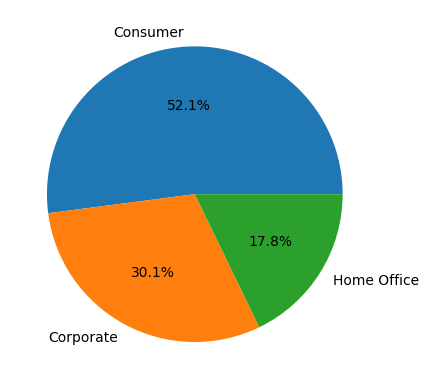

In [21]:
plt.pie(number_of_customers['count'], labels=number_of_customers['Type of Customers'],autopct='%1.1f%%')

In [ ]:
sales_per_segment=df.groupby('Segment')['Sales'].sum().reset_index()
sales_per_segment=sales_per_segment.rename(columns={'Segment':'Type of Customers','Sales':'Total Sales'})
print(sales_per_segment)



  Type of Customers   Total Sales
0          Consumer  1.148061e+06
1         Corporate  6.884941e+05
2       Home Office  4.249822e+05


<BarContainer object of 3 artists>

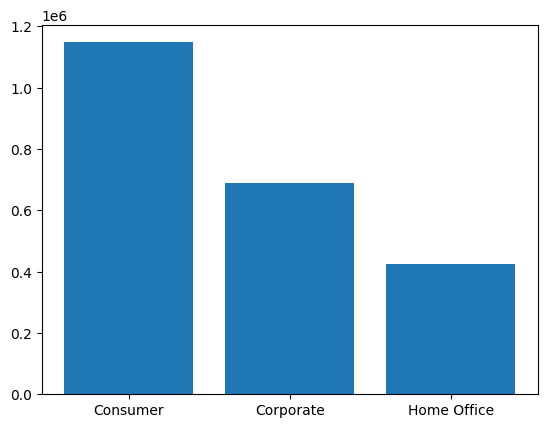

In [23]:
plt.bar(sales_per_segment['Type of Customers'],sales_per_segment['Total Sales'])

([<matplotlib.patches.Wedge at 0x16677160380>,
 [Text(-0.02642083976554102, 1.0996826538715994, 'Consumer'),
  Text(-0.5902005886829921, -0.9282581888236967, 'Corporate'),
  Text(0.913814451312435, -0.612326014940206, 'Home Office')],
 [Text(-0.014411367144840556, 0.5998269021117814, '50.8%'),
  Text(-0.3219275938270865, -0.5063226484492891, '30.4%'),
  Text(0.49844424617041905, -0.33399600814920327, '18.8%')])

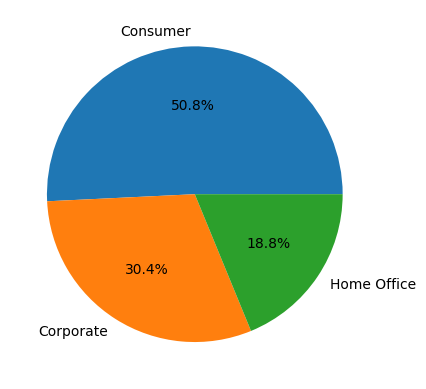

In [ ]:
plt.pie(sales_per_segment['Total Sales'], labels=sales_per_segment['Type of Customers'],autopct='%1.1f%%')

4:12